### import libraries

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Problem Statement

In [1]:
# To make car price prediction by using dependent and independent variables.
# Dependent Variable = "price"

# Independent Variables = 'make', 'model', 'year', 'mileage', 'hp', 'gear', 'fuel'

### Data Gathering

In [112]:
df = pd.read_csv("out.csv")
df

,make,model,year,mileage,hp,gear,fuel,price
0,Volkswagen,up,2019,31997,60,manual,gasoline,10190
1,Volkswagen,Polo,2022,100,95,manual,gasoline,24390
2,Volkswagen,Golf,2019,44607,116,manual,diesel,18630
3,Volkswagen,Tiguan,2019,42934,150,automatic,diesel,29990
4,Volkswagen,T6 Multivan,2021,10645,204,automatic,diesel,79890
...,...,...,...,...,...,...,...,...
144835,Volvo,XC 60,2022,0,197,automatic,gasoline,61900
144836,Volvo,XC 60,2022,0,197,automatic,diesel,61390
144837,Volvo,XC 60,2019,90321,235,automatic,diesel,34880
144838,Volvo,XC 60,2019,0,197,automatic,diesel,58990


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   make     144840 non-null  object
 1   model    144840 non-null  object
 2   year     144840 non-null  int64 
 3   mileage  144840 non-null  int64 
 4   hp       144840 non-null  int64 
 5   gear     144840 non-null  object
 6   fuel     144840 non-null  object
 7   price    144840 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.8+ MB


In [114]:
df.columns

Index(['make', 'model', 'year', 'mileage', 'hp', 'gear', 'fuel', 'price'], dtype='object')

### Exploratory data analysis

In [115]:
# Analyse each column

In [116]:
df.isna().sum()

make       0
model      0
year       0
mileage    0
hp         0
gear       0
fuel       0
price      0
dtype: int64

In [117]:
df.replace({0:np.nan},inplace=True)

In [118]:
df

,make,model,year,mileage,hp,gear,fuel,price
0,Volkswagen,up,2019,31997.0,60,manual,gasoline,10190
1,Volkswagen,Polo,2022,100.0,95,manual,gasoline,24390
2,Volkswagen,Golf,2019,44607.0,116,manual,diesel,18630
3,Volkswagen,Tiguan,2019,42934.0,150,automatic,diesel,29990
4,Volkswagen,T6 Multivan,2021,10645.0,204,automatic,diesel,79890
...,...,...,...,...,...,...,...,...
144835,Volvo,XC 60,2022,NaN,197,automatic,gasoline,61900
144836,Volvo,XC 60,2022,NaN,197,automatic,diesel,61390
144837,Volvo,XC 60,2019,90321.0,235,automatic,diesel,34880
144838,Volvo,XC 60,2019,NaN,197,automatic,diesel,58990


In [119]:
df.isna().sum()

make           0
model          0
year           0
mileage    15619
hp             0
gear           0
fuel           0
price          0
dtype: int64

In [120]:
df.isna().mean()*100

make        0.000000
model       0.000000
year        0.000000
mileage    10.783623
hp          0.000000
gear        0.000000
fuel        0.000000
price       0.000000
dtype: float64

### make

In [121]:
df["make"]

0         Volkswagen
1         Volkswagen
2         Volkswagen
3         Volkswagen
4         Volkswagen
             ...    
144835         Volvo
144836         Volvo
144837         Volvo
144838         Volvo
144839         Volvo
Name: make, Length: 144840, dtype: object

In [122]:
df["make"].value_counts()  # drop this column bcoz no impact of this column on price

Volkswagen       16551
Audi             13777
Mercedes-Benz    11416
Skoda            10927
BMW              10178
Ford             10068
Opel              9767
Renault           8915
Seat              8550
Hyundai           4302
CUPRA             4149
Volvo             3783
Kia               3024
Nissan            2912
Toyota            2571
Peugeot           2422
Dacia             2334
Mazda             2331
Citroën           2103
MINI              2038
Porsche           2024
Fiat              1594
Land              1584
Jaguar            1486
Jeep              1123
Suzuki             989
Mitsubishi         799
smart              756
Honda              501
Alfa               295
DS                 278
Abarth             233
Subaru             182
Ssangyong          170
Maserati           158
Lexus              105
Dodge              101
MG                  77
Aston               59
Tesla               54
Piaggio             49
ALPINA              32
Bentley             28
Cadillac   

### model    

In [123]:
df["model"].value_counts()  # Drop this column also

Leon                      3527
Golf                      3107
Octavia                   2623
Ateca                     2616
Formentor                 2291
                          ... 
CLS 220 Shooting Brake       1
SL 350                       1
MR 2                         1
S60 CC                       1
428                          1
Name: model, Length: 730, dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   make     144840 non-null  object 
 1   model    144840 non-null  object 
 2   year     144840 non-null  int64  
 3   mileage  129221 non-null  float64
 4   hp       144840 non-null  int64  
 5   gear     144840 non-null  object 
 6   fuel     144840 non-null  object 
 7   price    144840 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 8.8+ MB


### year     

In [125]:
df["year"]

0         2019
1         2022
2         2019
3         2019
4         2021
          ... 
144835    2022
144836    2022
144837    2019
144838    2019
144839    2021
Name: year, Length: 144840, dtype: int64

In [126]:
df["year"].value_counts() # No need to process

2022    35363
2021    34087
2019    28313
2020    19821
2018    15888
2017     6297
2016     3005
2015     1852
2014      199
2012       10
2013        5
Name: year, dtype: int64

### mileage  

In [127]:
df["mileage"]

0         31997.0
1           100.0
2         44607.0
3         42934.0
4         10645.0
           ...   
144835        NaN
144836        NaN
144837    90321.0
144838        NaN
144839        NaN
Name: mileage, Length: 144840, dtype: float64

In [128]:
df["mileage"] = np.log(df["mileage"])
df["mileage"]

0         10.373397
1          4.605170
2         10.705646
3         10.667419
4          9.272846
            ...    
144835          NaN
144836          NaN
144837    11.411125
144838          NaN
144839          NaN
Name: mileage, Length: 144840, dtype: float64

In [129]:
df["mileage"].isna().sum()

15619

In [130]:
df["mileage"].mean()

8.499150639860874

In [131]:
df["mileage"].median()

9.796792813865165

In [132]:
df["mileage"] = df["mileage"].fillna(df["mileage"].median())
df["mileage"]

0         10.373397
1          4.605170
2         10.705646
3         10.667419
4          9.272846
            ...    
144835     9.796793
144836     9.796793
144837    11.411125
144838     9.796793
144839     9.796793
Name: mileage, Length: 144840, dtype: float64

In [133]:
df["mileage"] = df["mileage"].astype(int)
df["mileage"]

0         10
1          4
2         10
3         10
4          9
          ..
144835     9
144836     9
144837    11
144838     9
144839     9
Name: mileage, Length: 144840, dtype: int32

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   make     144840 non-null  object
 1   model    144840 non-null  object
 2   year     144840 non-null  int64 
 3   mileage  144840 non-null  int32 
 4   hp       144840 non-null  int64 
 5   gear     144840 non-null  object
 6   fuel     144840 non-null  object
 7   price    144840 non-null  int64 
dtypes: int32(1), int64(3), object(4)
memory usage: 8.3+ MB


### gear

In [135]:
df["gear"]

0            manual
1            manual
2            manual
3         automatic
4         automatic
            ...    
144835    automatic
144836    automatic
144837    automatic
144838    automatic
144839    automatic
Name: gear, Length: 144840, dtype: object

In [136]:
df["gear"].value_counts().to_dict()

{'automatic': 93454, 'manual': 51386}

In [137]:
df["gear"].replace({'automatic': 1, 'manual': 0},inplace=True)

In [138]:
df["gear"]

0         0
1         0
2         0
3         1
4         1
         ..
144835    1
144836    1
144837    1
144838    1
144839    1
Name: gear, Length: 144840, dtype: int64

### fuel

In [139]:
df["fuel"]

0         gasoline
1         gasoline
2           diesel
3           diesel
4           diesel
            ...   
144835    gasoline
144836      diesel
144837      diesel
144838      diesel
144839      diesel
Name: fuel, Length: 144840, dtype: object

In [140]:
df["fuel"].value_counts()

gasoline             84173
diesel               43608
Hybrid - gasoline    10649
electric              5326
hybrid - diesel        650
gas                    357
other                   77
Name: fuel, dtype: int64

In [141]:
df = pd.get_dummies(df,columns=["fuel"])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   make                    144840 non-null  object
 1   model                   144840 non-null  object
 2   year                    144840 non-null  int64 
 3   mileage                 144840 non-null  int32 
 4   hp                      144840 non-null  int64 
 5   gear                    144840 non-null  int64 
 6   price                   144840 non-null  int64 
 7   fuel_Hybrid - gasoline  144840 non-null  uint8 
 8   fuel_diesel             144840 non-null  uint8 
 9   fuel_electric           144840 non-null  uint8 
 10  fuel_gas                144840 non-null  uint8 
 11  fuel_gasoline           144840 non-null  uint8 
 12  fuel_hybrid - diesel    144840 non-null  uint8 
 13  fuel_other              144840 non-null  uint8 
dtypes: int32(1), int64(4), object(2), ui

## Feature selection

### correlation

In [143]:
df.corr()

,year,mileage,hp,gear,price,fuel_Hybrid - gasoline,fuel_diesel,fuel_electric,fuel_gas,fuel_gasoline,fuel_hybrid - diesel,fuel_other
year,1.000000,-0.323569,0.000278,0.055480,0.159435,0.085125,-0.099958,0.058019,0.000568,0.022312,0.022541,0.007554
mileage,-0.323569,1.000000,0.083065,0.070916,-0.078075,-0.096223,0.184528,-0.081506,0.013428,-0.093253,0.017145,0.000060
hp,0.000278,0.083065,1.000000,0.444015,0.757795,0.081396,0.031301,0.098388,-0.040857,-0.107753,0.017670,-0.004846
gear,0.055480,0.070916,0.444015,1.000000,0.391298,0.155202,0.138670,0.128550,-0.042007,-0.259736,0.032083,-0.009817
price,0.159435,-0.078075,0.757795,0.391298,1.000000,0.084939,0.103435,0.135024,-0.034928,-0.197214,0.060751,-0.002492
fuel_Hybrid - gasoline,0.085125,-0.096223,0.081396,0.155202,0.084939,1.000000,-0.184891,-0.055041,-0.014003,-0.331820,-0.018914,-0.006497
fuel_diesel,-0.099958,0.184528,0.031301,0.138670,0.103435,-0.184891,1.000000,-0.128238,-0.032625,-0.773098,-0.044067,-0.015137
fuel_electric,0.058019,-0.081506,0.098388,0.128550,0.135024,-0.055041,-0.128238,1.000000,-0.009712,-0.230145,-0.013118,-0.004506
fuel_gas,0.000568,0.013428,-0.040857,-0.042007,-0.034928,-0.014003,-0.032625,-0.009712,1.000000,-0.058551,-0.003337,-0.001146
fuel_gasoline,0.022312,-0.093253,-0.107753,-0.259736,-0.197214,-0.331820,-0.773098,-0.230145,-0.058551,1.000000,-0.079086,-0.027166


<AxesSubplot: >

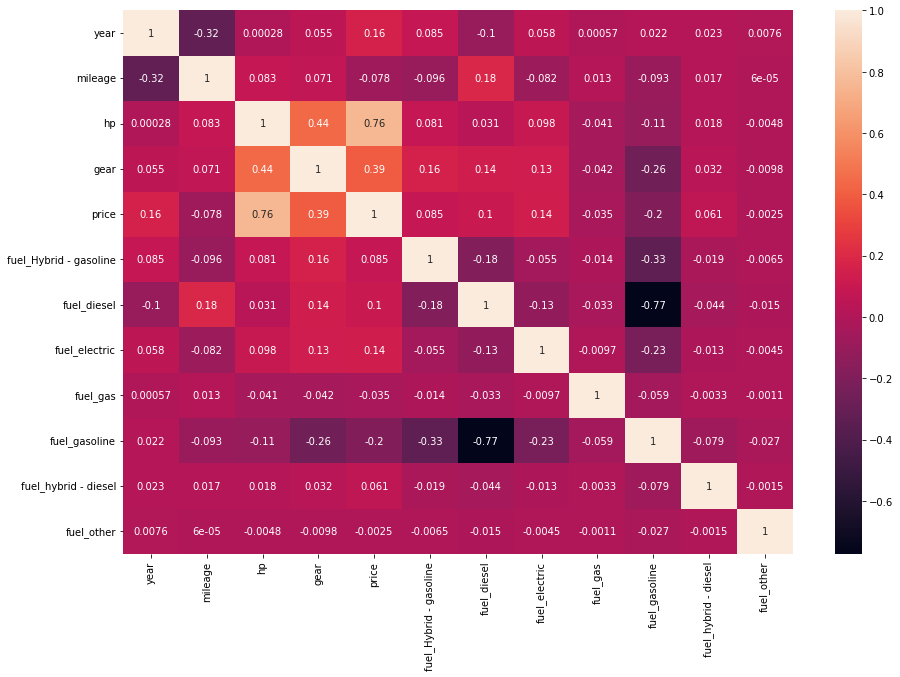

In [144]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [145]:
correlation = df.corr().loc["price"]
correlation.T

year                      0.159435
mileage                  -0.078075
hp                        0.757795
gear                      0.391298
price                     1.000000
fuel_Hybrid - gasoline    0.084939
fuel_diesel               0.103435
fuel_electric             0.135024
fuel_gas                 -0.034928
fuel_gasoline            -0.197214
fuel_hybrid - diesel      0.060751
fuel_other               -0.002492
Name: price, dtype: float64

In [146]:
df.head(30)

,make,model,year,mileage,hp,gear,price,fuel_Hybrid - gasoline,fuel_diesel,fuel_electric,fuel_gas,fuel_gasoline,fuel_hybrid - diesel,fuel_other
0,Volkswagen,up,2019,10,60,0,10190,0,0,0,0,1,0,0
1,Volkswagen,Polo,2022,4,95,0,24390,0,0,0,0,1,0,0
2,Volkswagen,Golf,2019,10,116,0,18630,0,1,0,0,0,0,0
3,Volkswagen,Tiguan,2019,10,150,1,29990,0,1,0,0,0,0,0
4,Volkswagen,T6 Multivan,2021,9,204,1,79890,0,1,0,0,0,0,0
5,Volkswagen,California,2021,9,114,1,44393,0,0,0,0,1,0,0
6,Volkswagen,T-Roc,2021,9,150,1,34895,0,0,0,0,1,0,0
7,Volkswagen,Golf Variant,2019,11,116,0,17590,0,1,0,0,0,0,0
8,Volkswagen,Polo,2018,10,116,1,18980,0,0,0,0,1,0,0
9,Volkswagen,Sharan,2020,10,177,1,44570,0,1,0,0,0,0,0


In [147]:
# plt.figure(figsize=(15,10))
sns.heatmap(correlation.T,annot=True)

IndexError: Inconsistent shape between the condition and the input (got (12, 1) and (12,))

In [148]:
correlation = correlation.head()
correlation

year       0.159435
mileage   -0.078075
hp         0.757795
gear       0.391298
price      1.000000
Name: price, dtype: float64

In [160]:
df.columns

Index(['make', 'model', 'year', 'mileage', 'hp', 'gear', 'price',
       'fuel_Hybrid - gasoline', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_gasoline', 'fuel_hybrid - diesel', 'fuel_other'],
      dtype='object')

In [175]:
df1 = df[["year","mileage","hp","gear","price"]]
df1.head(30)

,year,mileage,hp,gear,price
0,2019,10,60,0,10190
1,2022,4,95,0,24390
2,2019,10,116,0,18630
3,2019,10,150,1,29990
4,2021,9,204,1,79890
5,2021,9,114,1,44393
6,2021,9,150,1,34895
7,2019,11,116,0,17590
8,2018,10,116,1,18980
9,2020,10,177,1,44570


In [168]:
df

,make,model,year,mileage,hp,gear,price,fuel_Hybrid - gasoline,fuel_diesel,fuel_electric,fuel_gas,fuel_gasoline,fuel_hybrid - diesel,fuel_other
0,Volkswagen,up,2019,10,60,0,10190,0,0,0,0,1,0,0
1,Volkswagen,Polo,2022,4,95,0,24390,0,0,0,0,1,0,0
2,Volkswagen,Golf,2019,10,116,0,18630,0,1,0,0,0,0,0
3,Volkswagen,Tiguan,2019,10,150,1,29990,0,1,0,0,0,0,0
4,Volkswagen,T6 Multivan,2021,9,204,1,79890,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144835,Volvo,XC 60,2022,9,197,1,61900,0,0,0,0,1,0,0
144836,Volvo,XC 60,2022,9,197,1,61390,0,1,0,0,0,0,0
144837,Volvo,XC 60,2019,11,235,1,34880,0,1,0,0,0,0,0
144838,Volvo,XC 60,2019,9,197,1,58990,0,1,0,0,0,0,0


In [177]:
for i in range(df1.shape[1]-1):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    print(f"VIF of {df1.columns[i]} : ",vif)

VIF of year :  11.996716654858828
VIF of mileage :  8.926291010465583
VIF of hp :  12.9092156928646
VIF of gear :  3.5549513789301646


### model training

#### train test split

In [149]:
x = df.drop(["make","model","price"],axis=1)
y = df["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

### Evaluation

In [151]:
y_train_pred = linear_reg_model.predict(x_train)
y_train_pred[10:15]

array([63256.34045164, 94156.13918789,  2727.93806638, 38400.97058425,
       56127.07822202])

In [152]:
y_train[10:15]

92758      35990
124004    122180
19570       9290
100254     41550
72069      34440
Name: price, dtype: int64

In [153]:
y_train_pred[10:15]-y_train[10:15]

92758     27266.340452
124004   -28023.860812
19570     -6562.061934
100254    -3149.029416
72069     21687.078222
Name: price, dtype: float64

### Evaluation on training data

In [154]:
y_train_pred = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("MSE     :",  mse)

rmse = np.sqrt(mse)
print("RMSE    :",  rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print("MAE     :",  mae)

r_squared = r2_score(y_train,y_train_pred)
print("R2      :",  r_squared)

MSE     : 233222781.58247253
RMSE    : 15271.63323231908
MAE     : 8249.71674669378
R2      : 0.6291899850496412


### Evaluation on testing data

In [155]:
y_test_pred = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("MSE     :",  mse)

rmse = np.sqrt(mse)
print("RMSE    :",  rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("MAE     :",  mae)

r_squared = r2_score(y_test,y_test_pred)
print("R2      :",  r_squared)

MSE     : 234125465.83420292
RMSE    : 15301.158970293816
MAE     : 8137.627107597888
R2      : 0.6292604282700158


### After feature selection

In [88]:
x = df[["hp","gear","mileage"]]
y = df["price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [89]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

### Evaluation on training data

In [90]:
y_train_pred = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("MSE     :",  mse)

rmse = np.sqrt(mse)
print("RMSE    :",  rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print("MAE     :",  mae)

r_squared = r2_score(y_train,y_train_pred)
print("R2      :",  r_squared)

MSE     : 221267818.01879284
RMSE    : 14875.073714734755
MAE     : 8270.30387034804
R2      : 0.6386137217474328


### Evaluation on testing data

In [91]:
y_test_pred = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("MSE     :",  mse)

rmse = np.sqrt(mse)
print("RMSE    :",  rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("MAE     :",  mae)

r_squared = r2_score(y_test,y_test_pred)
print("R2      :",  r_squared)

MSE     : 297762112.6064469
RMSE    : 17255.784902647778
MAE     : 8297.997258921168
R2      : 0.5735477317822906
